<a href="https://colab.research.google.com/github/deceimo/Kathakali-face-expression-detection/blob/main/Kathakali_facial_expression_detection_CNN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import glob
import cv2
import keras
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#this was created because Google Colab does not allow cv2.imshow, so must patch by cv2_imshow.
#If we switch over to regular jupyter notebook not on Colab, we can change c2_imshow to cv2.imshow.
from google.colab.patches import cv2_imshow #only used when running in Google Colab
def my_imshow(title, img ):
  cv2_imshow(img) #should be changed to c2.imshow when not in Colab

In [ ]:
emotion = ['Anger','Love','Odious','Pitty','Terrible','Peace','Comic','Heroic','Wonder']

In [ ]:
#Create feature data which is importing picture from google drive
#Order of emotion
#0 - Anger
#1 - Love
#2 - Odious
#3 - Pitty
#4 - Terrible
#5 - Peace
#6 - Comic
#7 - Heroic
#8 - Wonder
images = [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/ColabNotebooks/NUS-internship-2023/picture-new/Anger-crop/*.*")]
images =  images + [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/ColabNotebooks/NUS-internship-2023/picture-new/Love-crop/*.*")]
images =  images + [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/ColabNotebooks/NUS-internship-2023/picture-new/Odious-crop/*.*")]
images =  images + [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/ColabNotebooks/NUS-internship-2023/picture-new/Pitty-crop/*.*")]
images =  images + [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/ColabNotebooks/NUS-internship-2023/picture-new/Terrible-crop/*.*")]
images =  images + [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/ColabNotebooks/NUS-internship-2023/picture-new/Peace-crop/*.*")]
images =  images + [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/ColabNotebooks/NUS-internship-2023/picture-new/Comic-crop/*.*")]
images =  images + [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/ColabNotebooks/NUS-internship-2023/picture-new/Heroic-crop/*.*")]
images =  images + [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/ColabNotebooks/NUS-internship-2023/picture-new/Wonder-crop/*.*")]

In [ ]:
print(len(images))

1740


In [ ]:
#Create result data
label = []
#Anger
for i in range(200):
    label.append(0)

#Love
for i in range(200):
    label.append(1)

#Odious
for i in range(200):
    label.append(2)

#Pitty
for i in range(200):
    label.append(3)

#Terrible
for i in range(200):
    label.append(4)

#Peace
for i in range(200):
    label.append(5)

#Comic
for i in range(200):
    label.append(6)

#Heroic
for i in range(170):
    label.append(7)

#Wonder
for i in range(170):
    label.append(8)


In [ ]:
feature = []

for i in images:
    new = cv2.resize(i, (32,32))
    feature.append(new)

In [ ]:
#Change to numpy array
feature = np.array(feature)
label = np.array(label)

In [ ]:
#Separate training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, label,test_size=0.2, stratify = label)

In [ ]:
# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training

X_train /= 255
X_test /= 255


# one-hot encoding using keras' numpy-related utilities
n_classes = 9
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (1392,)
Shape after one-hot encoding:  (1392, 9)


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(9, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 50)        1400      
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 75)        33825     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 75)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 75)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 125)       84500     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 125)        0         
 2D)                                                  

# **Before batch_size = 50**

In [ ]:
# training the model for 200 epochs
history = model.fit(X_train, Y_train, batch_size=50, epochs=100, validation_split=0.1, verbose=1)

Epoch 1/100
26/26 [==============================] - 3s 23ms/step - loss: 2.2097 - accuracy: 0.1230 - val_loss: 2.1917 - val_accuracy: 0.1643
Epoch 2/100
26/26 [==============================] - 0s 12ms/step - loss: 2.1916 - accuracy: 0.1238 - val_loss: 2.1824 - val_accuracy: 0.2143
Epoch 3/100
26/26 [==============================] - 0s 13ms/step - loss: 2.1610 - accuracy: 0.1701 - val_loss: 2.1043 - val_accuracy: 0.1714
Epoch 4/100
26/26 [==============================] - 0s 13ms/step - loss: 2.0413 - accuracy: 0.2324 - val_loss: 1.9055 - val_accuracy: 0.2929
Epoch 5/100
26/26 [==============================] - 0s 13ms/step - loss: 1.8113 - accuracy: 0.3299 - val_loss: 1.6293 - val_accuracy: 0.4286
Epoch 6/100
26/26 [==============================] - 0s 13ms/step - loss: 1.5051 - accuracy: 0.4417 - val_loss: 1.2581 - val_accuracy: 0.6214
Epoch 7/100
26/26 [==============================] - 0s 13ms/step - loss: 1.1939 - accuracy: 0.5751 - val_loss: 0.9593 - val_accuracy: 0.7143
Epoch 

In [ ]:
# Evaluate model's accuracy
score = model.evaluate(X_test, Y_test, verbose=0)
print("Loss is", score[0])
print("Accuracy score is", score[1])

Loss is 0.22599466145038605
Accuracy score is 0.931034505367279


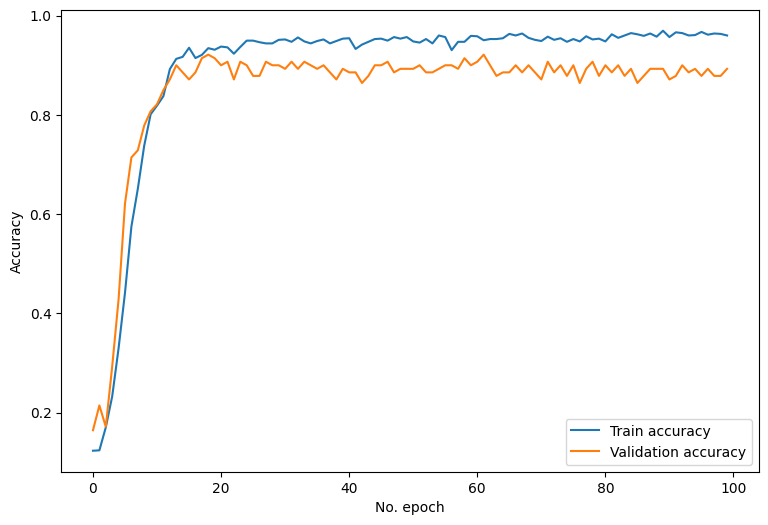

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

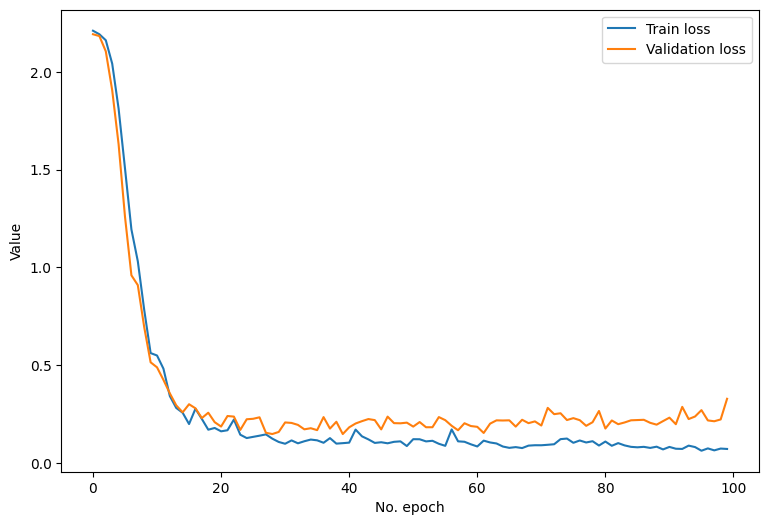

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.ylabel('Value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

11/11 [==============================] - 0s 3ms/step
Prediction probability array is:
Picture: 1


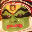

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.01 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 99.99 %
From which the max choice is: Wonder
Picture: 2


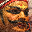

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 3


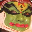

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 4


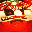

Anger: 0.0 %
Love: 0.04 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 15.18 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.01 %
Wonder: 84.77 %
From which the max choice is: Wonder
Picture: 5


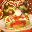

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.01 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 99.99 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 6


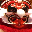

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 100.0 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 7


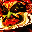

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 8


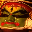

Anger: 0.0 %
Love: 0.0 %
Odious: 0.01 %
Pitty: 99.99 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 9


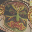

Anger: 0.01 %
Love: 0.0 %
Odious: 0.01 %
Pitty: 0.0 %
Terrible: 0.01 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 99.96 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 10


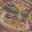

Anger: 99.98 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.01 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.01 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 11


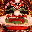

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 12


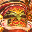

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 13


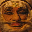

Anger: 0.0 %
Love: 99.99 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 14


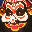

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 15


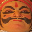

Anger: 0.01 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 99.99 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 16


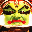

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 17


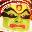

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 100.0 %
From which the max choice is: Wonder
Picture: 18


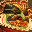

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 99.99 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 19


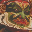

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 20


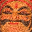

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.01 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 99.99 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 21


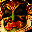

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 22


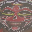

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 23


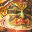

Anger: 0.01 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.01 %
Terrible: 0.02 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 99.95 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 24


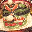

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 25


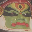

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 26


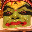

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 100.0 %
From which the max choice is: Wonder
Picture: 27


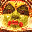

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.06 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 99.94 %
From which the max choice is: Wonder
Picture: 28


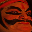

Anger: 0.01 %
Love: 0.0 %
Odious: 0.04 %
Pitty: 0.01 %
Terrible: 82.85 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 16.84 %
Wonder: 0.24 %
From which the max choice is: Terrible
Picture: 29


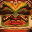

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 30


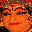

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 31


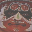

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 32


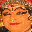

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 33


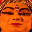

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 34


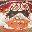

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 35


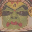

Anger: 0.0 %
Love: 0.0 %
Odious: 99.97 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.01 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.01 %
From which the max choice is: Odious
Picture: 36


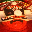

Anger: 0.0 %
Love: 0.03 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 54.77 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.01 %
Wonder: 45.18 %
From which the max choice is: Terrible
Picture: 37


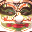

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 38


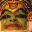

Anger: 2.79 %
Love: 0.0 %
Odious: 60.85 %
Pitty: 35.11 %
Terrible: 0.05 %
Peace: 0.47 %
Comic: 0.04 %
Heroic: 0.29 %
Wonder: 0.4 %
From which the max choice is: Odious
Picture: 39


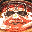

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 100.0 %
From which the max choice is: Wonder
Picture: 40


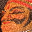

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 41


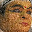

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 42


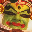

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 43


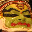

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 44


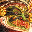

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 45


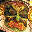

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 100.0 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 46


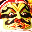

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 47


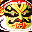

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 100.0 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 48


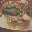

Anger: 0.06 %
Love: 0.0 %
Odious: 0.12 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.13 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 99.69 %
From which the max choice is: Wonder
Picture: 49


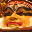

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 100.0 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 50


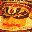

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 51


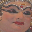

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 99.99 %
Heroic: 0.0 %
Wonder: 0.01 %
From which the max choice is: Comic
Picture: 52


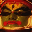

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 53


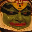

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 54


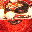

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 55


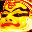

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 56


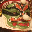

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 100.0 %
From which the max choice is: Wonder
Picture: 57


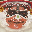

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 58


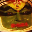

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 59


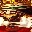

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 60


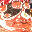

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 61


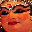

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 62


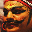

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 63


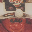

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 64


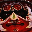

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 65


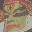

Anger: 0.0 %
Love: 0.0 %
Odious: 0.01 %
Pitty: 0.02 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 99.94 %
Heroic: 0.0 %
Wonder: 0.01 %
From which the max choice is: Comic
Picture: 66


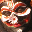

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 67


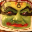

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 68


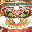

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 69


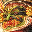

Anger: 99.87 %
Love: 0.0 %
Odious: 0.11 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.01 %
Wonder: 0.01 %
From which the max choice is: Anger
Picture: 70


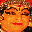

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 71


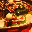

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 72


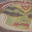

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 73


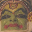

Anger: 3.81 %
Love: 0.06 %
Odious: 87.04 %
Pitty: 5.18 %
Terrible: 0.25 %
Peace: 0.82 %
Comic: 0.27 %
Heroic: 0.83 %
Wonder: 1.73 %
From which the max choice is: Odious
Picture: 74


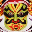

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 75


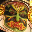

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 100.0 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 76


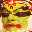

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 2.98 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 97.01 %
From which the max choice is: Wonder
Picture: 77


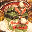

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 78


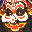

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 79


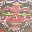

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 80


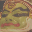

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 99.98 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.01 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 81


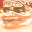

Anger: 0.01 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.01 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.01 %
Wonder: 99.97 %
From which the max choice is: Wonder
Picture: 82


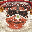

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 83


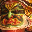

Anger: 0.01 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.01 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 99.98 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 84


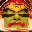

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 85


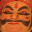

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 99.99 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 86


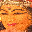

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 87


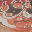

Anger: 0.0 %
Love: 0.0 %
Odious: 99.91 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.09 %
From which the max choice is: Odious
Picture: 88


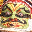

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 89


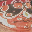

Anger: 0.0 %
Love: 0.0 %
Odious: 99.94 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.05 %
From which the max choice is: Odious
Picture: 90


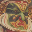

Anger: 0.0 %
Love: 0.0 %
Odious: 99.99 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 91


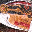

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 92


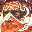

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 93


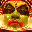

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 100.0 %
From which the max choice is: Wonder
Picture: 94


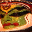

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 95


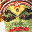

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 96


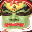

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 97


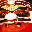

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 98


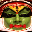

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 99


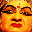

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 100


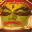

Anger: 0.0 %
Love: 0.0 %
Odious: 99.98 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.01 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 101


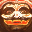

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 34.49 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 65.5 %
From which the max choice is: Wonder
Picture: 102


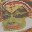

Anger: 0.0 %
Love: 0.0 %
Odious: 99.96 %
Pitty: 0.01 %
Terrible: 0.0 %
Peace: 0.01 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.01 %
From which the max choice is: Odious
Picture: 103


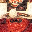

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 104


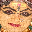

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 105


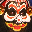

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 106


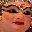

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 107


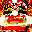

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 108


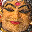

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 109


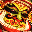

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 110


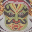

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 111


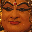

Anger: 0.01 %
Love: 4.98 %
Odious: 0.15 %
Pitty: 0.01 %
Terrible: 0.2 %
Peace: 0.06 %
Comic: 0.73 %
Heroic: 0.01 %
Wonder: 93.86 %
From which the max choice is: Wonder
Picture: 112


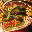

Anger: 99.98 %
Love: 0.0 %
Odious: 0.02 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 113


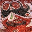

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 114


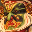

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 115


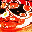

Anger: 0.0 %
Love: 0.0 %
Odious: 96.94 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 3.06 %
From which the max choice is: Odious
Picture: 116


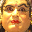

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 117


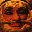

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 118


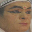

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 119


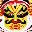

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 120


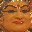

Anger: 0.0 %
Love: 0.01 %
Odious: 0.05 %
Pitty: 0.0 %
Terrible: 0.01 %
Peace: 0.37 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 99.55 %
From which the max choice is: Wonder
Picture: 121


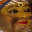

Anger: 0.01 %
Love: 0.1 %
Odious: 0.29 %
Pitty: 0.02 %
Terrible: 0.17 %
Peace: 0.01 %
Comic: 0.28 %
Heroic: 0.0 %
Wonder: 99.1 %
From which the max choice is: Wonder
Picture: 122


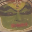

Anger: 0.0 %
Love: 0.01 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.01 %
Peace: 99.95 %
Comic: 0.0 %
Heroic: 0.02 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 123


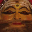

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 124


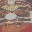

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 125


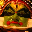

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 100.0 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 126


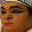

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 127


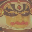

Anger: 0.05 %
Love: 0.01 %
Odious: 0.18 %
Pitty: 0.0 %
Terrible: 0.01 %
Peace: 98.71 %
Comic: 0.01 %
Heroic: 0.01 %
Wonder: 1.02 %
From which the max choice is: Peace
Picture: 128


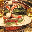

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 129


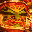

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 130


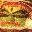

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 131


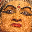

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 99.98 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.02 %
From which the max choice is: Terrible
Picture: 132


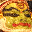

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 133


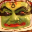

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 134


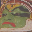

Anger: 0.03 %
Love: 0.0 %
Odious: 99.91 %
Pitty: 0.01 %
Terrible: 0.01 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.03 %
Wonder: 0.01 %
From which the max choice is: Odious
Picture: 135


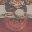

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 136


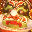

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 100.0 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 137


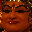

Anger: 0.0 %
Love: 0.01 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.01 %
Peace: 0.0 %
Comic: 0.1 %
Heroic: 0.0 %
Wonder: 99.87 %
From which the max choice is: Wonder
Picture: 138


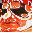

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 139


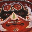

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 140


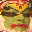

Anger: 0.0 %
Love: 0.01 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 39.06 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 60.92 %
From which the max choice is: Wonder
Picture: 141


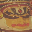

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 142


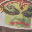

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 143


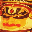

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 144


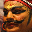

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 145


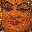

Anger: 0.0 %
Love: 3.75 %
Odious: 0.13 %
Pitty: 0.01 %
Terrible: 0.12 %
Peace: 0.03 %
Comic: 0.46 %
Heroic: 0.01 %
Wonder: 95.49 %
From which the max choice is: Wonder
Picture: 146


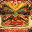

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 147


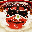

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 148


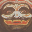

Anger: 0.0 %
Love: 0.01 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 50.86 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.04 %
Wonder: 49.08 %
From which the max choice is: Terrible
Picture: 149


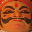

Anger: 0.02 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 99.98 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 150


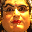

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 151


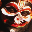

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 152


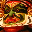

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 153


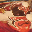

Anger: 0.0 %
Love: 0.0 %
Odious: 99.92 %
Pitty: 0.0 %
Terrible: 0.04 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.03 %
From which the max choice is: Odious
Picture: 154


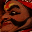

Anger: 99.89 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.05 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.04 %
Wonder: 0.02 %
From which the max choice is: Anger
Picture: 155


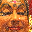

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 156


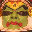

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 157


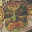

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 100.0 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 158


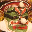

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 159


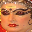

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 160


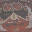

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 161


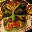

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 162


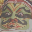

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 163


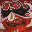

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 164


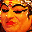

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 165


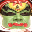

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 166


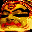

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 167


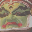

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 168


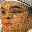

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 169


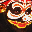

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 170


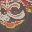

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 171


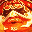

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 172


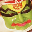

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 173


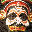

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 174


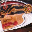

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 175


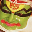

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 176


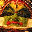

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 100.0 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 177


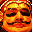

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 178


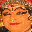

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 179


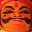

Anger: 0.03 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 99.97 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 180


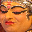

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 181


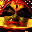

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 100.0 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 182


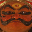

Anger: 0.01 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 99.99 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 183


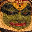

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 184


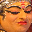

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 185


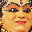

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 186


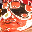

Anger: 0.0 %
Love: 99.99 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.01 %
From which the max choice is: Love
Picture: 187


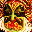

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 188


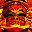

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 189


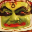

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 190


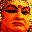

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 99.95 %
Terrible: 0.0 %
Peace: 0.01 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.04 %
From which the max choice is: Pitty
Picture: 191


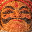

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 100.0 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 192


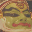

Anger: 0.0 %
Love: 0.0 %
Odious: 0.01 %
Pitty: 99.95 %
Terrible: 0.0 %
Peace: 0.02 %
Comic: 0.0 %
Heroic: 0.02 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 193


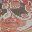

Anger: 0.0 %
Love: 99.63 %
Odious: 0.07 %
Pitty: 0.0 %
Terrible: 0.11 %
Peace: 0.0 %
Comic: 0.01 %
Heroic: 0.03 %
Wonder: 0.15 %
From which the max choice is: Love
Picture: 194


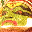

Anger: 99.93 %
Love: 0.0 %
Odious: 0.01 %
Pitty: 0.0 %
Terrible: 0.01 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.04 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 195


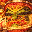

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 196


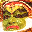

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 197


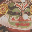

Anger: 0.0 %
Love: 99.96 %
Odious: 0.01 %
Pitty: 0.0 %
Terrible: 0.02 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.01 %
From which the max choice is: Love
Picture: 198


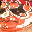

Anger: 0.0 %
Love: 0.01 %
Odious: 73.96 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 26.02 %
From which the max choice is: Odious
Picture: 199


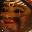

Anger: 0.01 %
Love: 0.25 %
Odious: 0.03 %
Pitty: 0.02 %
Terrible: 0.13 %
Peace: 0.03 %
Comic: 35.78 %
Heroic: 0.02 %
Wonder: 63.74 %
From which the max choice is: Wonder
Picture: 200


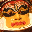

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 100.0 %
From which the max choice is: Wonder
Picture: 201


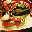

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 100.0 %
From which the max choice is: Wonder
Picture: 202


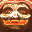

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 9.33 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 90.67 %
From which the max choice is: Wonder
Picture: 203


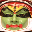

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 204


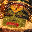

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 205


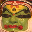

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 206


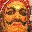

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 207


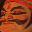

Anger: 0.09 %
Love: 0.01 %
Odious: 0.05 %
Pitty: 0.02 %
Terrible: 33.01 %
Peace: 0.02 %
Comic: 0.0 %
Heroic: 66.76 %
Wonder: 0.05 %
From which the max choice is: Heroic
Picture: 208


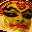

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 209


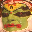

Anger: 0.0 %
Love: 0.02 %
Odious: 0.0 %
Pitty: 0.01 %
Terrible: 10.66 %
Peace: 0.01 %
Comic: 0.01 %
Heroic: 0.01 %
Wonder: 89.27 %
From which the max choice is: Wonder
Picture: 210


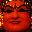

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 211


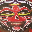

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 212


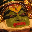

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 213


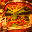

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 214


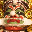

Anger: 0.0 %
Love: 0.0 %
Odious: 0.01 %
Pitty: 68.9 %
Terrible: 0.22 %
Peace: 0.01 %
Comic: 0.0 %
Heroic: 30.86 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 215


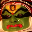

Anger: 0.08 %
Love: 0.0 %
Odious: 0.18 %
Pitty: 0.01 %
Terrible: 0.08 %
Peace: 0.06 %
Comic: 0.0 %
Heroic: 0.03 %
Wonder: 99.55 %
From which the max choice is: Wonder
Picture: 216


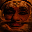

Anger: 0.0 %
Love: 99.91 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.09 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 217


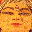

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 218


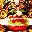

Anger: 0.0 %
Love: 0.01 %
Odious: 0.0 %
Pitty: 55.64 %
Terrible: 0.15 %
Peace: 0.01 %
Comic: 0.0 %
Heroic: 44.19 %
Wonder: 0.01 %
From which the max choice is: Pitty
Picture: 219


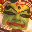

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 220


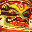

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 99.98 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.01 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 221


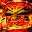

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 222


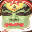

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 223


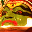

Anger: 99.98 %
Love: 0.0 %
Odious: 0.01 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.01 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 224


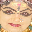

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 225


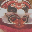

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 100.0 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 226


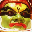

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.01 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 99.99 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 227


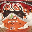

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 228


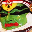

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 229


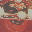

Anger: 99.95 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.02 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.02 %
Wonder: 0.01 %
From which the max choice is: Anger
Picture: 230


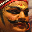

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 231


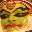

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 232


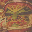

Anger: 0.01 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 99.95 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.04 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 233


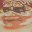

Anger: 0.08 %
Love: 0.01 %
Odious: 0.02 %
Pitty: 0.0 %
Terrible: 0.07 %
Peace: 0.02 %
Comic: 0.01 %
Heroic: 0.06 %
Wonder: 99.73 %
From which the max choice is: Wonder
Picture: 234


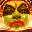

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 100.0 %
From which the max choice is: Wonder
Picture: 235


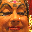

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 236


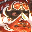

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 237


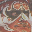

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 238


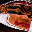

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 239


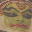

Anger: 0.0 %
Love: 0.02 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.01 %
Peace: 99.9 %
Comic: 0.0 %
Heroic: 0.01 %
Wonder: 0.05 %
From which the max choice is: Peace
Picture: 240


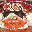

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 241


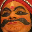

Anger: 0.01 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 99.99 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 242


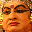

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 243


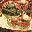

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 100.0 %
From which the max choice is: Wonder
Picture: 244


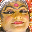

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 245


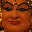

Anger: 0.01 %
Love: 6.13 %
Odious: 0.17 %
Pitty: 0.01 %
Terrible: 0.23 %
Peace: 0.06 %
Comic: 0.73 %
Heroic: 0.01 %
Wonder: 92.64 %
From which the max choice is: Wonder
Picture: 246


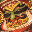

Anger: 99.98 %
Love: 0.0 %
Odious: 0.01 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.01 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 247


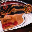

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 248


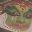

Anger: 0.0 %
Love: 0.01 %
Odious: 0.02 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.01 %
Comic: 99.89 %
Heroic: 0.02 %
Wonder: 0.05 %
From which the max choice is: Comic
Picture: 249


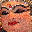

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 250


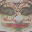

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 251


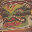

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 99.93 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.02 %
Wonder: 0.05 %
From which the max choice is: Terrible
Picture: 252


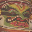

Anger: 0.0 %
Love: 0.01 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 99.2 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.69 %
Wonder: 0.09 %
From which the max choice is: Terrible
Picture: 253


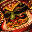

Anger: 99.99 %
Love: 0.0 %
Odious: 0.01 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 254


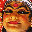

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 255


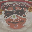

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 99.99 %
Heroic: 0.0 %
Wonder: 0.01 %
From which the max choice is: Comic
Picture: 256


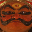

Anger: 0.01 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.01 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 99.99 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 257


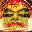

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 258


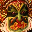

Anger: 99.98 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.01 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 259


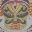

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 260


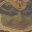

Anger: 0.0 %
Love: 99.98 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.01 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 261


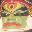

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 262


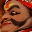

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 263


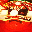

Anger: 0.0 %
Love: 0.05 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 28.22 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 71.72 %
From which the max choice is: Wonder
Picture: 264


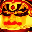

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 265


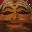

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 266


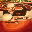

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 267


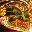

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 268


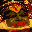

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 269


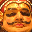

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 270


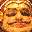

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 271


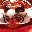

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 100.0 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 272


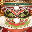

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 273


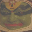

Anger: 0.0 %
Love: 99.66 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.04 %
Peace: 0.27 %
Comic: 0.0 %
Heroic: 0.02 %
Wonder: 0.01 %
From which the max choice is: Love
Picture: 274


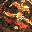

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 275


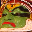

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 276


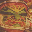

Anger: 0.01 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 99.99 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 277


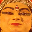

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 278


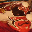

Anger: 0.0 %
Love: 0.03 %
Odious: 99.82 %
Pitty: 0.0 %
Terrible: 0.05 %
Peace: 0.03 %
Comic: 0.0 %
Heroic: 0.01 %
Wonder: 0.07 %
From which the max choice is: Odious
Picture: 279


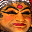

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 280


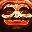

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 71.39 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.01 %
Wonder: 28.6 %
From which the max choice is: Terrible
Picture: 281


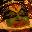

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 282


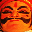

Anger: 99.92 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.08 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 283


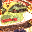

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 100.0 %
From which the max choice is: Wonder
Picture: 284


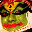

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 285


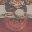

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 286


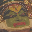

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 287


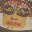

Anger: 0.0 %
Love: 0.0 %
Odious: 0.01 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.09 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 99.9 %
From which the max choice is: Wonder
Picture: 288


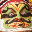

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 289


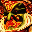

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 290


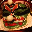

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 291


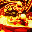

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 292


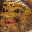

Anger: 0.01 %
Love: 1.19 %
Odious: 0.24 %
Pitty: 0.07 %
Terrible: 0.17 %
Peace: 0.08 %
Comic: 37.49 %
Heroic: 0.07 %
Wonder: 60.67 %
From which the max choice is: Wonder
Picture: 293


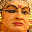

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 99.76 %
Terrible: 0.0 %
Peace: 0.23 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 294


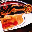

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 295


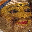

Anger: 0.01 %
Love: 0.15 %
Odious: 0.5 %
Pitty: 0.01 %
Terrible: 0.1 %
Peace: 0.03 %
Comic: 0.23 %
Heroic: 0.0 %
Wonder: 98.97 %
From which the max choice is: Wonder
Picture: 296


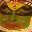

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 297


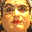

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 298


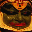

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 299


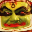

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 300


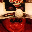

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 301


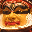

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 302


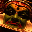

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 303


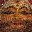

Anger: 0.0 %
Love: 0.0 %
Odious: 99.99 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.01 %
From which the max choice is: Odious
Picture: 304


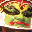

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 305


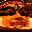

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.01 %
Comic: 0.0 %
Heroic: 99.99 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 306


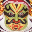

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 307


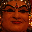

Anger: 0.0 %
Love: 99.99 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 308


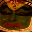

Anger: 0.0 %
Love: 0.84 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.03 %
Peace: 99.12 %
Comic: 0.0 %
Heroic: 0.01 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 309


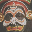

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 310


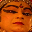

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 99.99 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 311


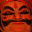

Anger: 0.06 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.5 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 99.42 %
Wonder: 0.01 %
From which the max choice is: Heroic
Picture: 312


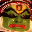

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.04 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 99.96 %
From which the max choice is: Wonder
Picture: 313


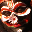

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 314


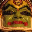

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 315


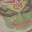

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 316


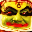

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 317


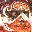

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 318


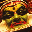

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 319


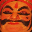

Anger: 0.01 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 99.99 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 320


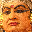

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 99.98 %
Terrible: 0.0 %
Peace: 0.02 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 321


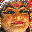

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 322


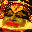

Anger: 100.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 323


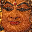

Anger: 0.0 %
Love: 9.86 %
Odious: 0.08 %
Pitty: 0.0 %
Terrible: 0.21 %
Peace: 0.02 %
Comic: 0.46 %
Heroic: 0.01 %
Wonder: 89.36 %
From which the max choice is: Wonder
Picture: 324


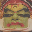

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 325


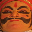

Anger: 95.67 %
Love: 0.0 %
Odious: 0.01 %
Pitty: 0.0 %
Terrible: 0.01 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 4.31 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 326


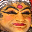

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 327


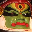

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 328


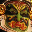

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 329


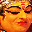

Anger: 0.0 %
Love: 100.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Love
Picture: 330


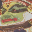

Anger: 0.0 %
Love: 0.01 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 99.99 %
From which the max choice is: Wonder
Picture: 331


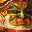

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.01 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 99.99 %
Wonder: 0.0 %
From which the max choice is: Heroic
Picture: 332


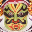

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 333


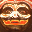

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 9.31 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 90.68 %
From which the max choice is: Wonder
Picture: 334


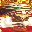

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 335


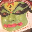

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 336


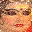

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 337


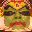

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 338


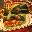

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 100.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Terrible
Picture: 339


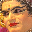

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 100.0 %
From which the max choice is: Wonder
Picture: 340


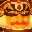

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 341


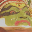

Anger: 99.98 %
Love: 0.0 %
Odious: 0.01 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Anger
Picture: 342


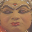

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 100.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Peace
Picture: 343


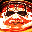

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 100.0 %
From which the max choice is: Wonder
Picture: 344


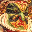

Anger: 0.0 %
Love: 0.0 %
Odious: 100.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Odious
Picture: 345


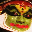

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 100.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Comic
Picture: 346


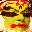

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 64.6 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 35.4 %
From which the max choice is: Terrible
Picture: 347


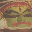

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 99.99 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.01 %
Wonder: 0.0 %
From which the max choice is: Pitty
Picture: 348


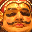

Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 100.0 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 0.0 %
From which the max choice is: Pitty


In [ ]:
# Make a prediction
pred = model.predict(X_test)
print("Prediction probability array is:")
predict = []

count = 1

for i in pred.squeeze():
    print("Picture:" ,count)
    my_imshow('',(X_test[count-1]*255))
    for number in range(9):
        print(f'{emotion[number]}: {round(i[number] * 100, 2)} %')
    count += 1
    print("From which the max choice is:", emotion[np.argmax(i)])
    predict.append(np.argmax(i))

In [ ]:
real = []
for i in Y_test:
    real.append(np.argmax(i))

In [ ]:
real = np.array(real)
predict = np.array(predict)
print(f"The real one: \n {real}")
print(f"The predicted one \n {predict}")
print ("Test data where predicted label equals the test label: \n", real == predict)
number_correct = (real == predict).sum()
print ("Number of correct predictions: %d. Out of total test cases %d which is %.4f%%." %(number_correct, real.shape[0], (float(number_correct)/real.shape[0])*100) )

The real one: 
 [8 4 6 4 7 7 0 3 7 0 2 3 1 1 7 2 8 4 0 7 2 6 7 5 5 8 8 7 4 6 5 6 5 3 2 8 1
 2 8 0 5 3 3 0 7 0 7 8 7 5 6 2 1 0 3 8 6 5 4 1 6 4 0 5 6 1 6 6 0 6 4 3 2 4
 7 4 5 1 6 3 8 6 7 3 7 1 2 0 8 2 2 4 8 3 0 5 4 5 4 2 8 2 0 6 1 6 2 6 0 4 1
 0 1 2 8 4 1 5 4 8 6 5 2 4 7 5 5 5 3 3 4 3 6 2 0 7 8 1 5 4 5 2 5 4 1 4 6 8
 0 4 1 0 2 0 1 2 7 5 4 5 2 0 1 1 5 3 0 5 1 1 3 1 3 2 1 7 3 6 7 1 7 7 1 1 6
 1 0 3 6 3 0 3 1 0 3 2 1 8 6 8 8 8 5 0 3 2 7 5 4 1 6 0 3 7 8 1 5 7 3 4 3 5
 0 6 7 7 3 2 0 4 5 3 8 8 1 4 4 2 5 3 7 3 8 6 1 0 2 6 6 1 4 4 0 6 6 7 3 0 4
 1 5 0 8 5 2 4 0 0 3 3 7 6 1 5 2 3 5 2 6 4 0 7 8 6 0 0 8 0 2 5 2 6 3 2 8 5
 4 1 6 0 5 2 2 2 7 4 1 5 3 3 7 8 1 2 1 6 4 2 7 3 6 0 8 3 7 6 5 2 1 8 7 4 4
 4 6 4 2 4 8 5 0 5 8 2 6 8 3 3]
The predicted one 
 [8 4 6 8 7 7 0 3 7 0 2 3 1 1 7 2 8 4 0 7 2 6 7 5 5 8 8 4 4 6 5 6 5 3 2 4 1
 2 8 0 5 3 3 0 7 0 7 8 7 5 6 2 1 0 3 8 6 5 4 1 6 4 0 5 6 1 6 6 0 6 4 3 2 4
 7 8 5 1 6 3 8 6 7 3 7 1 2 0 2 2 2 4 8 3 0 5 4 5 4 2 8 2 0 6 1 6 2 6 0 4 8
 0 1 2 2 4 1 5 4 8 8 5 2 4 7 5 5

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from sklearn import metrics

cm = confusion_matrix(real, predict)
cm_df = pd.DataFrame(cm,
                     index = ['Anger','Love','Odious','Pitty','Terrible','Peace','Comic','Heroic','Wonder'],
                     columns = ['Anger','Love','Odious','Pitty','Terrible','Peace','Comic','Heroic','Wonder'])

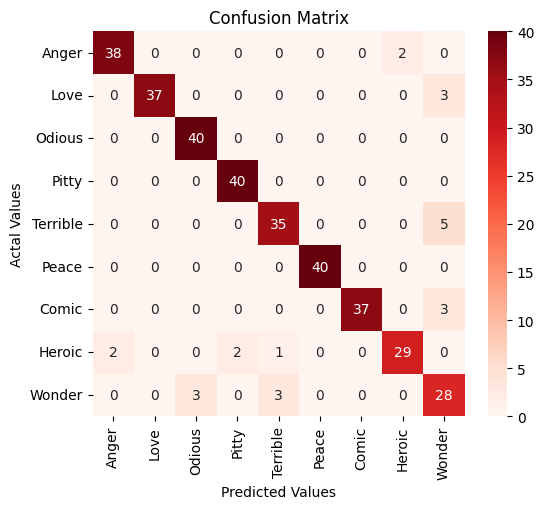

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt = 'g', cmap="Reds")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
met = metrics.classification_report(real, predict)

In [ ]:
print(met)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       1.00      0.93      0.96        40
           2       0.93      1.00      0.96        40
           3       0.95      1.00      0.98        40
           4       0.90      0.88      0.89        40
           5       1.00      1.00      1.00        40
           6       1.00      0.93      0.96        40
           7       0.94      0.85      0.89        34
           8       0.72      0.82      0.77        34

    accuracy                           0.93       348
   macro avg       0.93      0.93      0.93       348
weighted avg       0.94      0.93      0.93       348



In [ ]:
model.save('kathakali.h5')

# **Face detection and emotion prediction**

In [ ]:
test = [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/ColabNotebooks/NUS-internship-2023/picture-new/Wonder/*.*")]

In [ ]:
!pip3 install face_detection
import face_detection
import cv2

  Preparing metadata (setup.py) ... done
  Created wheel for face_detection: filename=face_detection-0.2.2-py3-none-any.whl size=25559 sha256=fbc5fb0a6a685dce55698c6f16c9c17ca121c2d08bb937833e1584c655e39bcf
  Stored in directory: /root/.cache/pip/wheels/f9/14/a1/617e184738e71e46c1e75f068f67a911917ae5d02faeabc4e4
Successfully built face_detection


In [ ]:
accu=[0,0,0,0,0,0,0,0,0]

In [ ]:
print(accu)

[0, 1, 1, 8, 3, 2, 1, 0, 14]


Downloading: "https://folk.ntnu.no/haakohu/WIDERFace_DSFD_RES152.pth" to /root/.cache/torch/hub/checkpoints/WIDERFace_DSFD_RES152.pth
100%|██████████| 459M/459M [00:27<00:00, 17.3MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


face found: 1


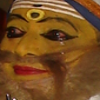

1/1 [==============================] - 0s 91ms/step
Anger: 6.25 %
Love: 4.23 %
Odious: 12.92 %
Pitty: 5.36 %
Terrible: 4.71 %
Peace: 14.14 %
Comic: 15.16 %
Heroic: 1.46 %
Wonder: 35.78 %
This picture is Wonder
face found: 1


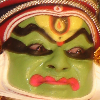

1/1 [==============================] - 0s 21ms/step
Anger: 4.42 %
Love: 0.11 %
Odious: 31.15 %
Pitty: 16.08 %
Terrible: 2.03 %
Peace: 7.84 %
Comic: 0.18 %
Heroic: 3.26 %
Wonder: 34.93 %
This picture is Wonder
face found: 1


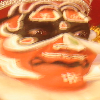

1/1 [==============================] - 0s 18ms/step
Anger: 1.59 %
Love: 0.03 %
Odious: 0.96 %
Pitty: 0.15 %
Terrible: 0.03 %
Peace: 0.2 %
Comic: 0.13 %
Heroic: 0.18 %
Wonder: 96.74 %
This picture is Wonder
face found: 4


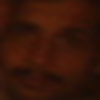

1/1 [==============================] - 0s 18ms/step
Anger: 5.42 %
Love: 10.64 %
Odious: 10.23 %
Pitty: 15.55 %
Terrible: 8.38 %
Peace: 17.58 %
Comic: 13.05 %
Heroic: 12.11 %
Wonder: 7.04 %
This picture is Peace


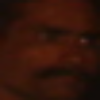

1/1 [==============================] - 0s 20ms/step
Anger: 2.85 %
Love: 14.25 %
Odious: 5.87 %
Pitty: 10.4 %
Terrible: 5.01 %
Peace: 21.44 %
Comic: 28.68 %
Heroic: 4.93 %
Wonder: 6.58 %
This picture is Comic


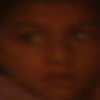

1/1 [==============================] - 0s 19ms/step
Anger: 3.8 %
Love: 11.61 %
Odious: 8.29 %
Pitty: 21.85 %
Terrible: 7.29 %
Peace: 17.03 %
Comic: 13.01 %
Heroic: 8.98 %
Wonder: 8.14 %
This picture is Pitty


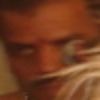

1/1 [==============================] - 0s 19ms/step
Anger: 2.45 %
Love: 1.64 %
Odious: 6.46 %
Pitty: 56.84 %
Terrible: 3.0 %
Peace: 15.98 %
Comic: 4.63 %
Heroic: 6.25 %
Wonder: 2.75 %
This picture is Pitty
face found: 2


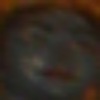

1/1 [==============================] - 0s 18ms/step
Anger: 20.37 %
Love: 6.58 %
Odious: 8.64 %
Pitty: 8.28 %
Terrible: 8.3 %
Peace: 23.17 %
Comic: 4.9 %
Heroic: 14.19 %
Wonder: 5.56 %
This picture is Peace


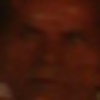

1/1 [==============================] - 0s 18ms/step
Anger: 4.86 %
Love: 8.48 %
Odious: 10.21 %
Pitty: 24.37 %
Terrible: 8.48 %
Peace: 15.36 %
Comic: 9.68 %
Heroic: 11.24 %
Wonder: 7.32 %
This picture is Pitty
face found: 4


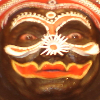

1/1 [==============================] - 0s 19ms/step
Anger: 0.09 %
Love: 0.0 %
Odious: 0.2 %
Pitty: 0.0 %
Terrible: 12.28 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 87.43 %
This picture is Wonder


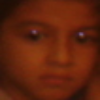

1/1 [==============================] - 0s 17ms/step
Anger: 2.13 %
Love: 7.92 %
Odious: 6.0 %
Pitty: 38.76 %
Terrible: 4.52 %
Peace: 16.26 %
Comic: 11.85 %
Heroic: 6.02 %
Wonder: 6.54 %
This picture is Pitty


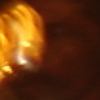

1/1 [==============================] - 0s 18ms/step
Anger: 7.13 %
Love: 2.48 %
Odious: 17.99 %
Pitty: 11.13 %
Terrible: 25.85 %
Peace: 6.44 %
Comic: 0.83 %
Heroic: 22.89 %
Wonder: 5.25 %
This picture is Terrible


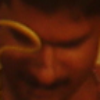

1/1 [==============================] - 0s 18ms/step
Anger: 2.3 %
Love: 6.35 %
Odious: 7.85 %
Pitty: 45.03 %
Terrible: 6.39 %
Peace: 13.84 %
Comic: 7.82 %
Heroic: 5.85 %
Wonder: 4.57 %
This picture is Pitty
face found: 1


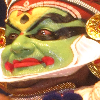

1/1 [==============================] - 0s 28ms/step
Anger: 4.34 %
Love: 0.17 %
Odious: 2.84 %
Pitty: 0.47 %
Terrible: 0.01 %
Peace: 4.0 %
Comic: 0.06 %
Heroic: 0.03 %
Wonder: 88.07 %
This picture is Wonder
face found: 1


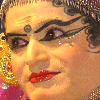

1/1 [==============================] - 0s 19ms/step
Anger: 0.24 %
Love: 21.71 %
Odious: 5.73 %
Pitty: 7.21 %
Terrible: 9.77 %
Peace: 10.39 %
Comic: 12.42 %
Heroic: 0.46 %
Wonder: 32.06 %
This picture is Wonder
face found: 1


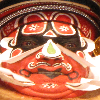

1/1 [==============================] - 0s 21ms/step
Anger: 0.0 %
Love: 0.0 %
Odious: 0.18 %
Pitty: 0.95 %
Terrible: 0.0 %
Peace: 0.0 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 98.86 %
This picture is Wonder
face found: 1


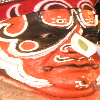

1/1 [==============================] - 0s 27ms/step
Anger: 0.57 %
Love: 0.02 %
Odious: 80.21 %
Pitty: 0.02 %
Terrible: 0.06 %
Peace: 0.01 %
Comic: 0.0 %
Heroic: 0.0 %
Wonder: 19.1 %
This picture is Odious
face found: 4


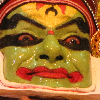

1/1 [==============================] - 0s 18ms/step
Anger: 3.04 %
Love: 0.08 %
Odious: 8.59 %
Pitty: 0.47 %
Terrible: 1.93 %
Peace: 10.03 %
Comic: 0.06 %
Heroic: 3.4 %
Wonder: 72.4 %
This picture is Wonder


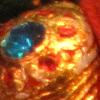

1/1 [==============================] - 0s 17ms/step
Anger: 19.92 %
Love: 1.1 %
Odious: 8.76 %
Pitty: 32.92 %
Terrible: 2.9 %
Peace: 3.52 %
Comic: 0.8 %
Heroic: 5.2 %
Wonder: 24.88 %
This picture is Pitty


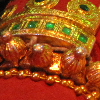

1/1 [==============================] - 0s 18ms/step
Anger: 7.51 %
Love: 4.92 %
Odious: 11.93 %
Pitty: 20.67 %
Terrible: 21.61 %
Peace: 8.76 %
Comic: 7.46 %
Heroic: 5.92 %
Wonder: 11.23 %
This picture is Terrible
error occurred
face found: 1


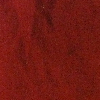

1/1 [==============================] - 0s 18ms/step
Anger: 3.87 %
Love: 2.93 %
Odious: 6.08 %
Pitty: 57.04 %
Terrible: 5.0 %
Peace: 7.32 %
Comic: 2.15 %
Heroic: 9.72 %
Wonder: 5.9 %
This picture is Pitty
face found: 1


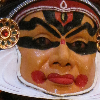

1/1 [==============================] - 0s 19ms/step
Anger: 0.0 %
Love: 0.0 %
Odious: 0.01 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.32 %
Comic: 0.38 %
Heroic: 0.0 %
Wonder: 99.28 %
This picture is Wonder
face found: 1


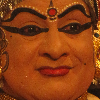

1/1 [==============================] - 0s 38ms/step
Anger: 0.89 %
Love: 20.83 %
Odious: 1.22 %
Pitty: 2.12 %
Terrible: 3.07 %
Peace: 5.72 %
Comic: 2.6 %
Heroic: 1.21 %
Wonder: 62.34 %
This picture is Wonder
face found: 1


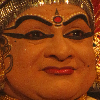

1/1 [==============================] - 0s 96ms/step
Anger: 0.48 %
Love: 21.89 %
Odious: 4.09 %
Pitty: 19.83 %
Terrible: 4.86 %
Peace: 20.1 %
Comic: 14.57 %
Heroic: 1.49 %
Wonder: 12.69 %
This picture is Love
face found: 2


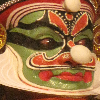

1/1 [==============================] - 0s 20ms/step
Anger: 7.3 %
Love: 0.02 %
Odious: 0.18 %
Pitty: 0.06 %
Terrible: 0.0 %
Peace: 3.0 %
Comic: 0.02 %
Heroic: 0.01 %
Wonder: 89.4 %
This picture is Wonder


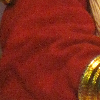

1/1 [==============================] - 0s 18ms/step
Anger: 2.52 %
Love: 2.45 %
Odious: 3.04 %
Pitty: 62.44 %
Terrible: 2.36 %
Peace: 10.87 %
Comic: 2.04 %
Heroic: 12.36 %
Wonder: 1.91 %
This picture is Pitty
face found: 0
face found: 1


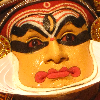

1/1 [==============================] - 0s 19ms/step
Anger: 0.0 %
Love: 0.0 %
Odious: 0.0 %
Pitty: 0.0 %
Terrible: 0.0 %
Peace: 0.14 %
Comic: 0.01 %
Heroic: 0.0 %
Wonder: 99.85 %
This picture is Wonder
face found: 0
face found: 1


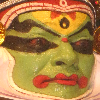

1/1 [==============================] - 0s 30ms/step
Anger: 0.58 %
Love: 3.71 %
Odious: 15.47 %
Pitty: 3.14 %
Terrible: 50.84 %
Peace: 4.05 %
Comic: 0.59 %
Heroic: 2.37 %
Wonder: 19.26 %
This picture is Terrible
face found: 1


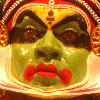

1/1 [==============================] - 0s 18ms/step
Anger: 0.09 %
Love: 0.05 %
Odious: 0.21 %
Pitty: 0.04 %
Terrible: 0.1 %
Peace: 1.14 %
Comic: 0.14 %
Heroic: 0.14 %
Wonder: 98.1 %
This picture is Wonder
face found: 0
face found: 1


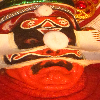

1/1 [==============================] - 0s 27ms/step
Anger: 2.58 %
Love: 0.1 %
Odious: 2.15 %
Pitty: 1.56 %
Terrible: 27.23 %
Peace: 0.02 %
Comic: 0.0 %
Heroic: 0.78 %
Wonder: 65.57 %
This picture is Wonder
face found: 0


In [ ]:
detector = face_detection.build_detector("DSFDDetector", confidence_threshold=.5, nms_iou_threshold=.3)
for img in test:
    # detect faces in the image
    faces = detector.detect(img)
    print(f'face found: {len(faces)}')
    faces = faces.astype(int)

    # loop over all detected faces
    if len(faces) > 0:
        for x, y, w, h, prob in faces:
            try:
                face = img[y:h, x:w]
                eiei=cv2.resize(face, (100,100))
                my_imshow("Cropped Face", eiei)
                new = cv2.resize(face, (32,32))
                new = new.reshape(1, 32, 32, 3)
                new= new.astype('float32')
                dummy= new.copy() / 255
                pred = model.predict(dummy)
                i = pred.squeeze()
                for number in range(9):
                    print(f'{emotion[number]}: {round(i[number] * 100, 2)} %')
                print(f'This picture is {emotion[np.argmax(i)]}')
                accu[np.argmax(i)]+=1
            except:
                print('error occurred')